In [1]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Bar, Line

# 绘制叠加的条形图和折线图
# 导入数据
data = pd.read_excel('../data/1~12月份的降水量、蒸发量、平均温度数据.xlsx')
print(data)
init_opts = opts.InitOpts(width='800px',height='400px')
bar = (Bar(init_opts)
       .add_xaxis(data['月份'].tolist())
       .add_yaxis('蒸发量',data['蒸发量'].tolist())
       .add_yaxis('降水量',data['降水量'].tolist())
       .set_global_opts(
           xaxis_opts=opts.AxisOpts(name='月份',name_location='center',name_gap=25),
           title_opts=opts.TitleOpts(title='1~12月份的降水量、蒸发量、平均温度数据叠加的条形图和折线图'),
           yaxis_opts=opts.AxisOpts(
               name='蒸发量/降水量(mm)',name_location='center',name_gap= 46,
               axislabel_opts=opts.LabelOpts(formatter='{value}')
           )
       )
       .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
       .extend_axis(
           yaxis=opts.AxisOpts(
               name='平均温度(摄氏度)',name_location='center',name_gap=55,
               axislabel_opts=opts.LabelOpts(formatter='{value}'),interval=2.5
           )
       )
)
line = (Line(init_opts)
        .add_xaxis(data['月份'].tolist())
        .add_yaxis('平均温度',data['平均温度'].tolist(),yaxis_index=1)
)
bar.overlap(line)
bar.render('../tmp/overlap.html')

     月份    蒸发量    降水量  平均温度
0    1月    2.0    2.6   2.0
1    2月    4.9    5.9   2.2
2    3月    7.0    9.0   3.3
3    4月   23.2   26.4   4.5
4    5月   25.6   28.7   6.3
5    6月   76.7   70.7  10.2
6    7月  135.6  175.6  20.3
7    8月  162.2  182.2  23.4
8    9月   32.6   48.7  23.0
9   10月   20.0   18.8  16.5
10  11月    6.4    6.0  12.0
11  12月    3.3    2.3   6.2


'/Users/YacovSong/TechPythonCode/data visualization/5/tmp/overlap.html'

In [2]:
from pyecharts.charts import Scatter
# 绘制叠加的散点图和折线图
data1 = pd.read_excel('../data/商家A和商家B的各类商品的销售数据.xlsx',index_col='商家')
print(data1)
line = (Line(init_opts)
        .add_xaxis(data.columns.tolist())
        .add_yaxis('商家A',data1.loc['商家A'].tolist())
        .add_yaxis('商家B',data1.loc['商家B'].tolist())
)

scatter = (Scatter(init_opts)
           .add_xaxis(data.columns.tolist())
           .add_yaxis('商家A',data1.loc['商家A'].tolist(),
                     label_opts=opts.LabelOpts(is_show=False),
                     symbol_size=20,symbol='diamond')
           .add_yaxis('商家B',data1.loc['商家B'].tolist(),
                     label_opts=opts.LabelOpts(is_show=False),
                     symbol_size=20,symbol='pin')
           .set_global_opts(title_opts=opts.TitleOpts(title='商家A和商家B商品销售数据'))
)
scatter.overlap(line)
scatter.render('../tmp/overlap1.html')

      衬衫   毛衣   领带   裤子   风衣  高跟鞋   袜子
商家                                    
商家A  120   56   28   98  129   28  107
商家B   60  140  153  145  160   70   54


'/Users/YacovSong/TechPythonCode/data visualization/5/tmp/overlap1.html'

In [3]:
from pyecharts.charts import Funnel
# 绘制漏斗图
data2 = pd.read_excel('../data/某淘宝店铺的订单转化率统计数据.xlsx')
print(data2)
x_data = data2['网购环节'].tolist()
y_data = data2['人数'].tolist()
data2 = [[x_data[i],y_data[i]] for i in range(len(x_data))]
print(data2)
funnel = (Funnel(init_opts)
          .add('',data_pair=data2,label_opts=opts.LabelOpts(
              position='inside',formatter="{b}:{d}%"),gap=2,
               tooltip_opts=opts.TooltipOpts(trigger='item'),
               itemstyle_opts=opts.ItemStyleOpts(border_color='#fff',border_width=1)
              )
          .set_global_opts(title_opts=opts.TitleOpts(title='某淘宝店铺的订单转化率漏斗图'),
                           legend_opts=opts.LegendOpts(pos_left='40%')
                          )
)
funnel.render('../tmp/funnel1.html')

    网购环节    人数
0   浏览商品  2000
1  加入购物车   900
2   生成订单   400
3   支付订单   320
4   完成交易   300
[['浏览商品', 2000], ['加入购物车', 900], ['生成订单', 400], ['支付订单', 320], ['完成交易', 300]]


'/Users/YacovSong/TechPythonCode/data visualization/5/tmp/funnel1.html'

In [4]:
from pyecharts.charts import HeatMap
# 绘制热力图

data3 = pd.read_excel('../data/heatmap.xlsx',index_col=0)
print(data3)
# 处理数据
y_data = list(data3.columns)
x_data = list(data3.index)
values = data3.iloc[:,0:7].values.tolist()
value = [[i,j,values[i][j]]for i in range(len(x_data)) for j in range(len(y_data))]
heatmap = (HeatMap(init_opts)
           .add_xaxis(x_data)
           .add_yaxis('',
                      y_data,
                      value,
                      label_opts=opts.LabelOpts(is_show=True,position='inside')
                     )
           .set_global_opts(
               title_opts=opts.TitleOpts(title='某网站某周一周点击量热力图'),
               visualmap_opts=opts.VisualMapOpts(pos_bottom='center')
           )
)
heatmap.render('../tmp/heatmap.html')

    星期一  星期二  星期三  星期四  星期五  星期六  星期日
时间                                   
1     3   63    3   50   78   74   92
2    43   40    5   39    9   32   46
3    57   55   71   39   26    3   48
4    43   73   86   37   36   96   52
5    99   58   80   97   30   53   37
6    37   29    7   84   73   23   48
7    23   77    6   74   81   98   74
8    63   25   46   78   29   48   61
9    67   94    8   54   37   54   32
10    3   30   49   94   42   71   36
11   61   74   89   95   67    8   55
12   59   14   17   76   81   38   51
13   82   72   31   10    3   80   86
14    8    9    4   52   31   83   18
15   32   74   33   54   75    3   83
16   63   32   77   59   19    5   45
17   48   61   93   58   74   62   17
18   67   23   33   64   39   29    8
19   16   59   35   51   40   96   84
20   65   68   88   57   68   70   54
21  100   79   47   19    8   65    3
22   44   53   93   82   31   83   86
23   68   76   15   27   14   69   38
24   19   70   90   40   51   97   94


'/Users/YacovSong/TechPythonCode/data visualization/5/tmp/heatmap.html'

In [26]:
from pyecharts.charts import WordCloud
# 绘制词云图
data_read = pd.read_csv('../data/worldcloud.csv',encoding='gbk')
words = list(data_read['词语'].values)
num = list(data_read['频数'].values)
data4 = [k for k in zip(words,num)]
data4 = [(i,str(j)) for i,j in data4]
wordcloud = (WordCloud()
             .add(series_name='宋词频率统计',
                  data_pair=data4,word_size_range=[10,100],
                 shape='diamond',rotate_step=60)
             .set_global_opts(title_opts=opts.TitleOpts(
                                 title='部分宋词词频词云图',
                                 title_textstyle_opts=opts.TextStyleOpts(font_size=23)
                                ),
                tooltip_opts=opts.TooltipOpts(is_show=True)
                )
)
wordcloud.render('../tmp/wordcloud.html')

'/Users/YacovSong/TechPythonCode/data visualization/5/tmp/wordcloud.html'

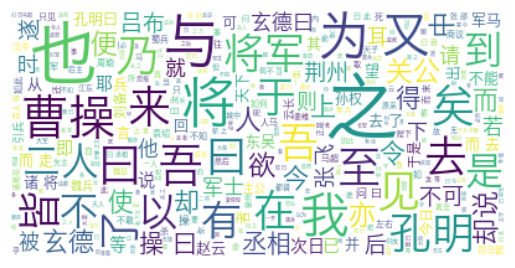

In [27]:
from wordcloud import WordCloud
import jieba
with open('../data/三国演义.txt',encoding='UTF-8') as f:
    text = f.read()
cut_text = " ".join(jieba.lcut(text))
cloud = WordCloud(
    font_path="/System/Library/Fonts/Hiragino Sans GB.ttc",
    background_color='white',
    max_words=4000,
    max_font_size=60
)
wCloud = cloud.generate(cut_text)
wCloud.to_file('../tmp/cloud.jpg')
import matplotlib.pyplot as plt
plt.imshow(wCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from pyecharts.charts import Graph
# 绘制微信好友关系图
# 节点
nodes = [opts.GraphNode(name='周建',symbol='circle',symbol_size=20),
         opts.GraphNode(name='黄婧',symbol='circle',symbol_size=20),
         opts.GraphNode(name='文华',symbol='circle',symbol_size=20),
         opts.GraphNode(name='贺芳',symbol='pin',symbol_size=10),
         opts.GraphNode(name='吴大',symbol='pin',symbol_size=10),
         opts.GraphNode(name='张三',symbol='roundrect',symbol_size=15),
         opts.GraphNode(name='刘霞',symbol='diamond',symbol_size=15),
]
# 关系
links = [opts.GraphLink(source='周建',target='贺芳',value='夫妻'),
         opts.GraphLink(source='周建',target='吴大',value='同事'),
         opts.GraphLink(source='周建',target='张三',value='同学'),
         opts.GraphLink(source='周建',target='刘霞',value='同学'),
         opts.GraphLink(source='黄婧',target='张三',value='朋友'),
         opts.GraphLink(source='黄婧',target='刘霞',value='同事'),
         opts.GraphLink(source='文华',target='刘霞',value='夫妻'),
         opts.GraphLink(source='文华',target='吴大',value='同事'),
]
# 绘图
graph = (Graph()
        .add(series_name='',
            nodes=nodes,
             is_roam=True,
             is_rotate_label=True,
             links=links,repulsion=4000,
             edge_label=opts.LabelOpts(
                 is)
            )
            )
        )